<a href="https://colab.research.google.com/github/Noks06/Prediction-of-Product-Sales/blob/main/Sales_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sales -Predictions
 by Nokuthula Mchunu

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
# Loading Data
import pandas as pd
df_prediction = pd.read_csv('/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv')
# preview dataframe info
df_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [27]:
# preview top 5 rows
df_prediction.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Data Cleaning

In [28]:
df_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


1. There are 8523 rows and and 12 columns

2. There are 4 floats, 1 int and 4 objects

In [29]:
# Checking duplicate
df_prediction.duplicated().sum()

0

In [30]:
# Identifying Missing Values
df_prediction.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [31]:
# checking Item_Weight datatype
df_prediction['Item_Weight'].dtype

dtype('float64')

In [32]:
# checking Item_Weight datatype
df_prediction['Outlet_Size'].dtype

dtype('O')

In [33]:
# Filling the missing value in 'Item_Weight' with -1
df_prediction['Item_Weight'] =df_prediction['Item_Weight'].fillna(-1)


In [34]:
# Filling the missing value in 'Outlet_Size' with Missing
df_prediction['Outlet_Size'] =df_prediction['Outlet_Size'].fillna('Missing')


In [35]:
# Checking iif there are any missing values
df_prediction.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [36]:
# Checking for any consistancy of the data  in dataframe
incon_column =df_prediction.select_dtypes('object').columns
incon_column
# using for loop to loop through list of columns
for lnames in incon_column:
  print(df_prediction[lnames].value_counts())
  print(" ")

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64
 
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
 
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
 
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64
 
Mediu

In [37]:
# Removing inconsistance
df_prediction['Item_Fat_Content'] =df_prediction['Item_Fat_Content'].replace({'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'})
df_prediction['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [38]:
# Obtaing Summary statistics for numerical values
num_values = incon_column =df_prediction.select_dtypes('number').columns



In [39]:
# using for loop to run through columns
for num_v in num_values:
  print(f"{df_prediction[num_v]} has min={df_prediction[num_v].min()}, max={df_prediction[num_v].max()} and mean={df_prediction[num_v].mean()}")
  print(" ")

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64 has min=-1.0, max=21.35 and mean=10.478936407368296
 
0       0.016047
1       0.019278
2       0.016760
3       0.000000
4       0.000000
          ...   
8518    0.056783
8519    0.046982
8520    0.035186
8521    0.145221
8522    0.044878
Name: Item_Visibility, Length: 8523, dtype: float64 has min=0.0, max=0.328390948 and mean=0.06613202877895108
 
0       249.8092
1        48.2692
2       141.6180
3       182.0950
4        53.8614
          ...   
8518    214.5218
8519    108.1570
8520     85.1224
8521    103.1332
8522     75.4670
Name: Item_MRP, Length: 8523, dtype: float64 has min=31.29, max=266.8884 and mean=140.9927819781767
 
0       1999
1       2009
2       1999
3       1998
4       1987
        ... 
8518    1987
8519    2002
8520    2004
8521    2009
8522    1997
Na

# Project 1 Part 3 (Core) wk 3

In [40]:
df_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [41]:
# Getting Statistical analysis
df_prediction.describe()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.478936,0.066132,140.992782,1997.831867,2181.288914
std,6.720742,0.051598,62.275067,8.371760,1706.499616
min,-1.000000,0.000000,31.290000,1985.000000,33.290000
25%,6.650000,0.026989,93.826500,1987.000000,834.247400
50%,11.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [42]:
df_prediction.nunique()

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                2
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [43]:
# Viewing the top 5 data in dataset
df_prediction.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Missing,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Explore Item_outlet_Sales

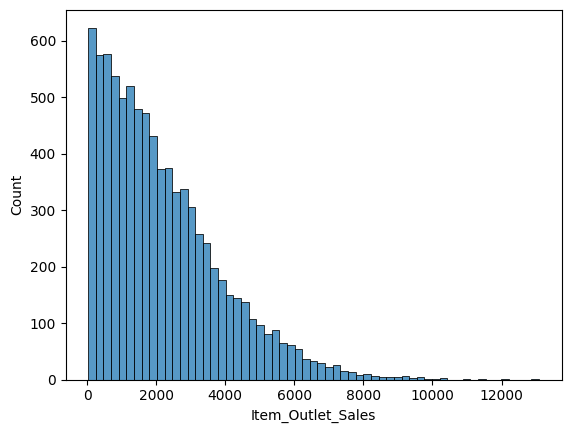

In [44]:
# importing  important libralies

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sbn

ax1 = sbn.histplot(data = df_prediction, x ='Item_Outlet_Sales')


## Explore Item_fat Content vs Item_outlet_Sales

Text(0.5, 1.0, 'Item_Fat_Content vs Item_Outlet_Sales')

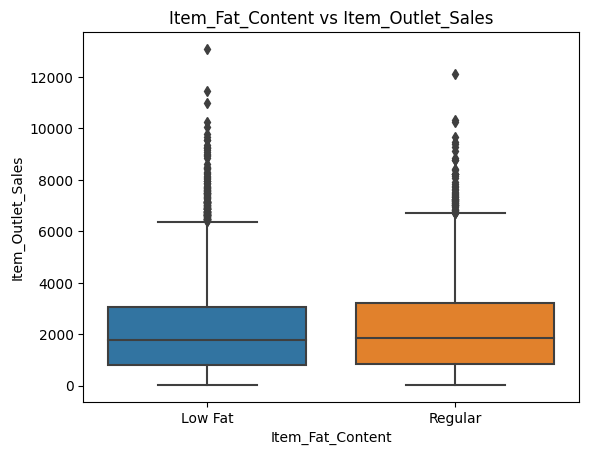

In [45]:
# using seaborn boxplot to
ax2 = sbn.boxplot(data = df_prediction, x='Item_Fat_Content',y ='Item_Outlet_Sales')
ax2.set_title('Item_Fat_Content vs Item_Outlet_Sales')

The outcome that we see in the above graph shows that between Low Fat and Regular content there are no difference except for the outliers that shows little difference

## Explore Item_Type

Text(0.5, 1.0, 'Distribution of Item Type')

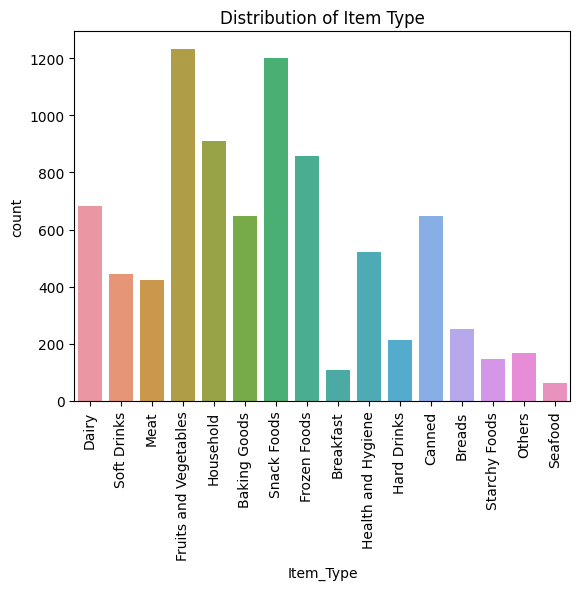

In [46]:
# Using Countplot to explore Item_Type

ax3 = sbn.countplot(data =df_prediction, x ='Item_Type')
ax3.tick_params(axis ='x', rotation =90 )
ax3.set_title('Distribution of Item Type')

The graph above shows that Fruit and Vegitables are highly distributed among the Item_Type meanwhile seafood has a low distribution.

## Viewing The correlation Between Features

In [47]:
# Using view the correlation
cor = df_prediction.corr()
cor.round(2)

<ipython-input-47-b1ac50b9a45c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df_prediction.corr()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.08,0.02,0.54,-0.06
Item_Visibility,-0.08,1.00,-0.00,-0.07,-0.13
Item_MRP,0.02,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,0.54,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,-0.06,-0.13,0.57,-0.05,1.00


Text(0.5, 1.0, 'Correlation features')

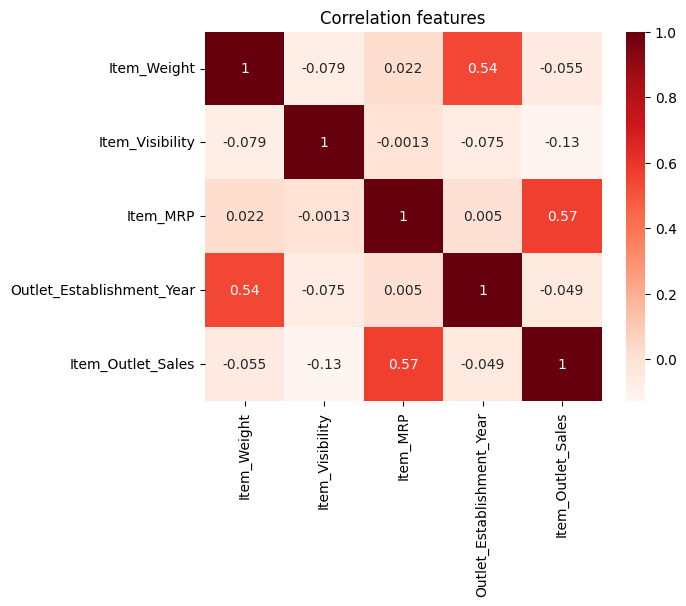

In [48]:
# using seaborn heatmap to view the correlation
ax4 = sbn.heatmap(cor,cmap ='Reds', annot =True)
ax4.set_title('Correlation features')

The above correlation shows that Item_Outlet_Sales have a stronger correlation to Item_MRP followed by  Outlet_Establishment to Item_Weight while Item_visibility to Item_OutletSales have the weekest Correlation.

Text(0.5, 1.0, 'Outlet size vs Outlet sales')

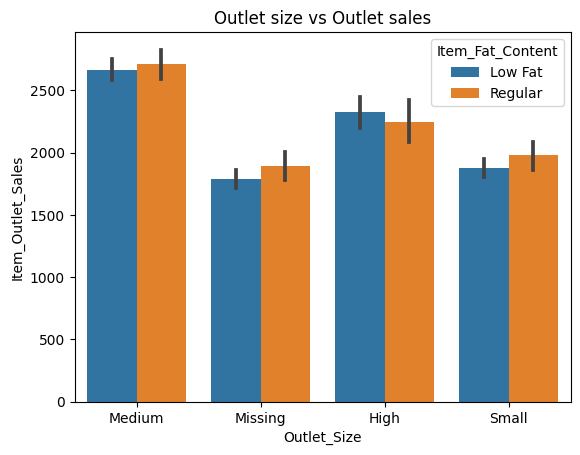

In [61]:
ax5 = sbn.barplot(data =df_prediction, x ='Outlet_Size',y='Item_Outlet_Sales', hue ='Item_Fat_Content')
ax5.set_title('Outlet size vs Outlet sales')

The above graph show that Medium outlet has the highest sales .